In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import category_encoders as ce

Прогнозируем  вес мальков летучих рыб по их различным характеристикам!

In [17]:
train_df = pd.read_csv('TrainDataFlight.csv')
y_train = train_df['Weight']
X_train = train_df.drop(['Weight'],axis=1)
X_test = pd.read_csv('TestDataFlight.csv')

train_df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Cypselurus,35.0,38.5,44.1,18.0369,6.3063,920.0
1,Hirundichthys,10.0,10.5,11.6,1.9720,1.1600,7.5
2,Cypselurus,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Exocoetus,24.0,26.0,29.2,8.8768,4.4968,290.0
4,Parexocoetus,18.4,20.0,22.4,8.8928,3.2928,150.0


закодируем колонку Speices

In [18]:
bec_train = ce.BinaryEncoder(cols=['Species'])
bec_test = ce.BinaryEncoder(cols=['Species'])
X_test_species = X_test['Species']
X_train = bec_train.fit_transform(X_train)
X_test = bec_test.fit_transform(X_test)

In [19]:
y_train.describe()

count     119.000000
mean      414.822689
std       374.921759
min         0.000000
25%       127.500000
50%       290.000000
75%       667.500000
max      1650.000000
Name: Weight, dtype: float64

Проверяем , состояие данных .смотрим на средне и стандартное отклонение не привышает ли оно 75% , т.е. на наличие выбросов

In [20]:
X_train.describe()

,Species_0,Species_1,Species_2,Length1,Length2,Length3,Height,Width
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.563025,0.563025,0.504202,26.836975,29.056303,31.956303,9.186697,4.463197
std,0.498109,0.498109,0.502096,10.368023,11.101318,11.964387,4.237880,1.637972
min,0.000000,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.148400
25%,0.000000,0.000000,0.000000,19.350000,21.150000,23.350000,6.110000,3.385650
50%,1.000000,1.000000,1.000000,25.400000,27.500000,30.100000,7.786000,4.305600
75%,1.000000,1.000000,1.000000,33.250000,36.200000,40.150000,12.462000,5.472750
max,1.000000,1.000000,1.000000,59.000000,63.400000,68.000000,18.754200,8.142000


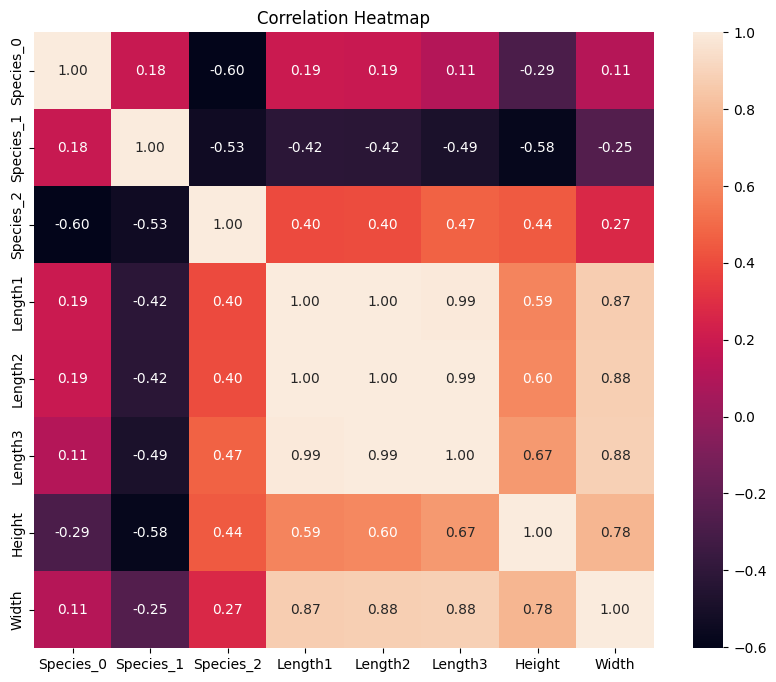

In [21]:

plt.figure(figsize=(10, 8))  # Устанавливаем размер фигуры
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')  # Используем cmap для цветовой карты
plt.title('Correlation Heatmap')  # Заголовок графика
plt.show()  # Показываем график

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)
cv = cross_val_score(model, X_train, y_train, cv=5)
pred = model.predict(X_test)
pred

array([-4.92460395e+02,  9.62024602e+02,  1.28048069e+02,  6.31188308e+02,
       -1.55511974e+02,  5.59085930e+02, -3.65365910e+02,  5.44154166e+02,
        5.17967822e+02, -3.84841896e+02,  4.75647781e+02,  6.33321789e+02,
        6.58853141e+02,  1.07267469e+00,  2.78781430e+02, -3.98684957e+02,
        1.15460308e+03,  2.06625715e+02, -4.48012424e+02,  9.46206427e+01,
        9.78099262e+02,  7.51832589e+02,  1.48962683e+02,  2.33860807e+02,
        2.56316502e+02,  4.68609156e+02,  4.31245317e+02,  5.31034977e+02,
        6.66693700e+01,  6.71808553e+02, -4.51784727e+02, -9.02790174e+01,
        9.18817600e+02, -4.40047215e+02, -2.48524475e+02,  9.80870005e+01,
        6.60529265e+02,  5.03299173e+02, -1.35373150e+01,  3.13503568e+02])

In [23]:
cv

array([0.93658677, 0.91698898, 0.87852075, 0.84983189, 0.91208327])

In [30]:
X_test['Weight'] = pred
X_test['Species'] = X_test_species
X_test = X_test.drop(['Species_0','Species_1','Species_2'], axis =1)

In [25]:
X_test['Weight'] = X_test['Weight'].astype(int)
X_test['Weight'].dtype

dtype('int64')

In [31]:
X_test.loc[X_test['Weight'] < 0 ,'Weight'] = np.nan
X_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Species
0,9.3,9.8,10.8,1.7388,1.0476,NaN,Hirundichthys
1,34.8,37.3,39.8,6.2884,4.0198,962.024602,Fodiater
2,19.0,20.7,23.2,9.3960,3.4104,128.048069,Parexocoetus
3,34.6,37.0,39.3,10.5717,6.3666,631.188308,Cheilopogon
4,21.1,22.5,25.0,6.4000,3.8000,NaN,Exocoetus


In [35]:
X_test.to_csv('Predict_Weight.csv',index=False,na_rep='NaN')